Built a predictive model to suggest which country a new user's first Airbnb booking destination will be by their website browsing logs. 
Performed data wrangling, exploratory data analysis, inferential statistics, information visualization using the Python libraries and as a result compared accuracies of machine learning algorithms to estimate the best fit for predictive analysis

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
train_users = pd.read_csv('train_users.csv')
train_users.groupby(['country_destination']).size()

country_destination
AU          539
CA         1428
DE         1061
ES         2249
FR         5023
GB         2324
IT         2835
NDF      124543
NL          762
PT          217
US        62376
other     10094
dtype: int64

In [4]:
plot=train_users
len(train_users)

213451

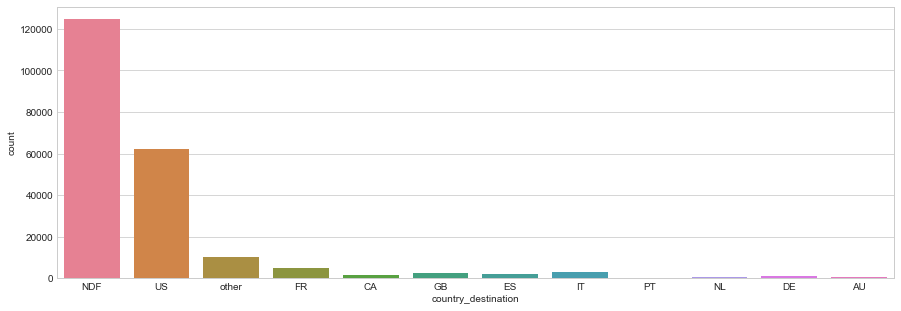

In [5]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x='country_destination', data=train_users, palette="husl", ax=axis1)

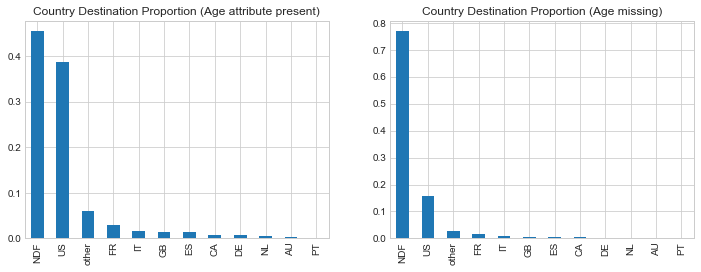

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
complete_age = plot[plot.age.notnull()].country_destination.value_counts()
missing_age = plot[plot.age.isnull()].country_destination.value_counts()
complete_age.div(complete_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age attribute present)',ax=axes[0])
missing_age.div(missing_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age missing)',ax=axes[1])

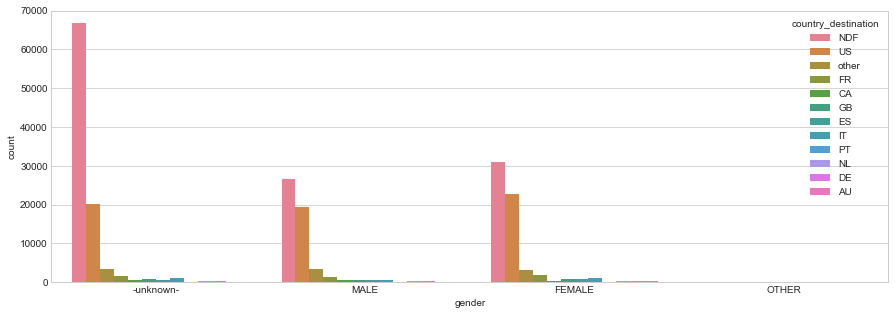

In [7]:
# frequency of country_destination for every gender
fig, (axis1) = plt.subplots(1,1,figsize=(15,5))
sns.countplot(x="gender",hue="country_destination", data=plot, palette="husl", ax=axis1)

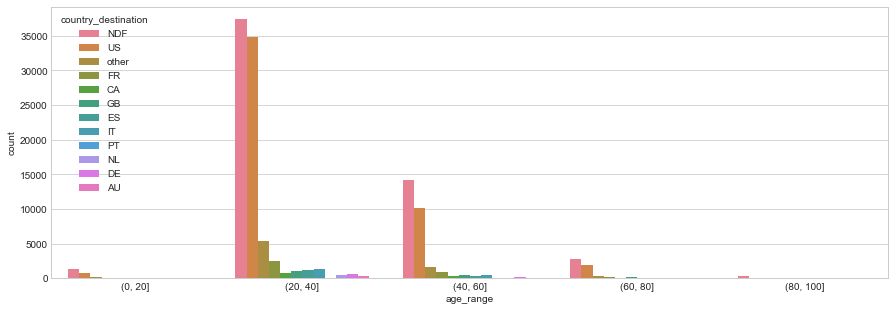

In [8]:
# Plot
fig, (axis2) = plt.subplots(1,1,figsize=(15,5))

# cut age values into ranges 
train_users['age_range'] = pd.cut(train_users["age"], [0, 20, 40, 60, 80, 100])

# frequency of country_destination for every age range
sns.countplot(x="age_range",hue="country_destination", data=plot, palette="husl", ax=axis2)

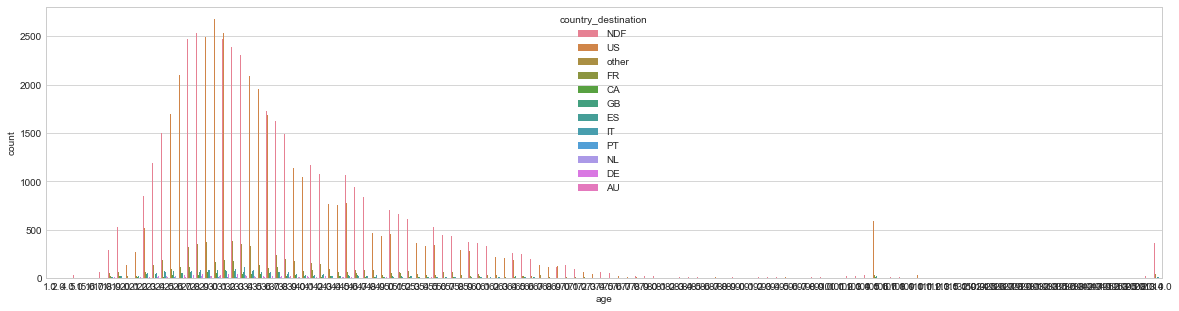

In [9]:
# frequency of country_destination for every gender
fig, (axis1) = plt.subplots(1,1,figsize=(20,5))
sns.countplot(x="age",hue="country_destination", data=plot, palette="husl", ax=axis1)

The age data shows some interesting differentiation by country destination that could be useful. Users who book trips to Spain and Portugal tend to be younger while those that book trips to Great Britain tend to be older.

(10, 60)

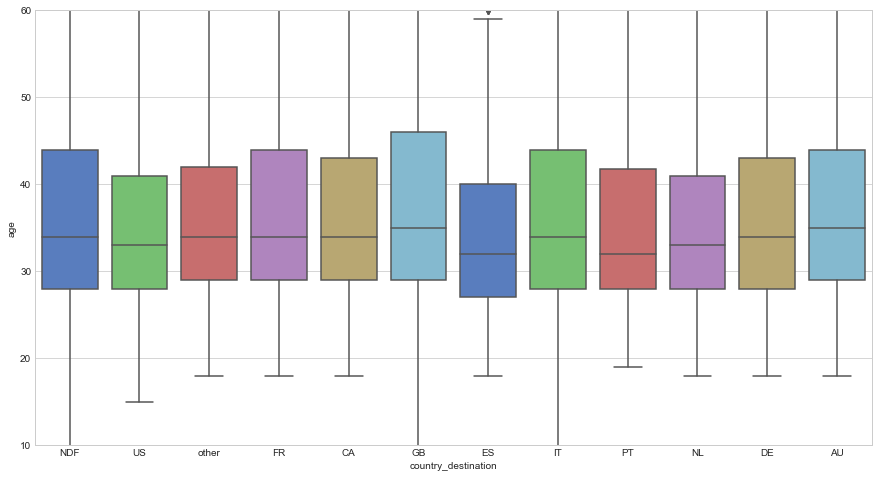

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='country_destination', y='age', data=plot, palette="muted", ax =ax)
ax.set_ylim([10, 60])

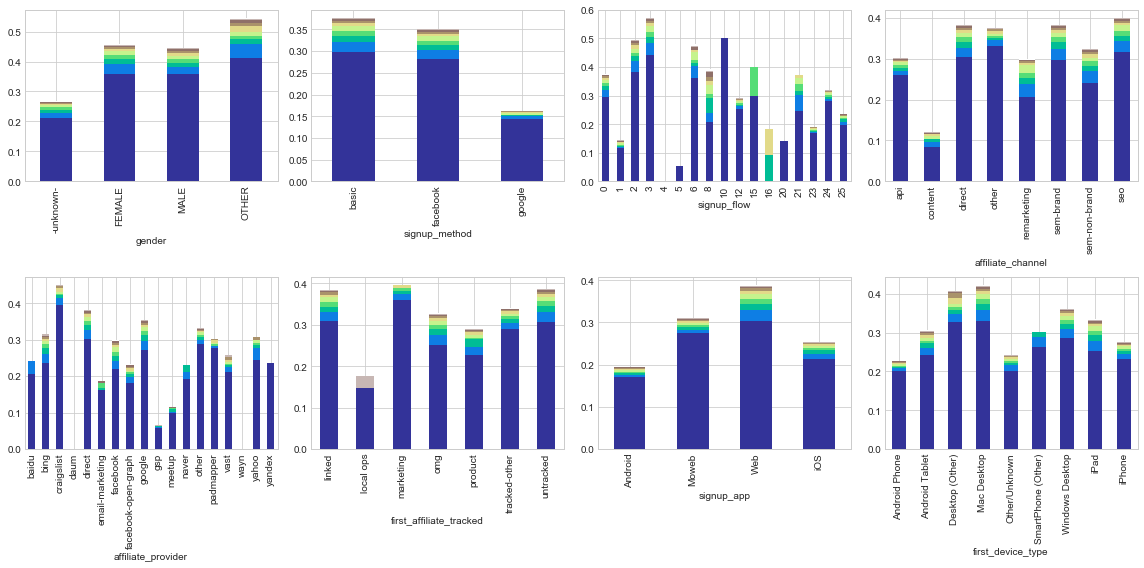

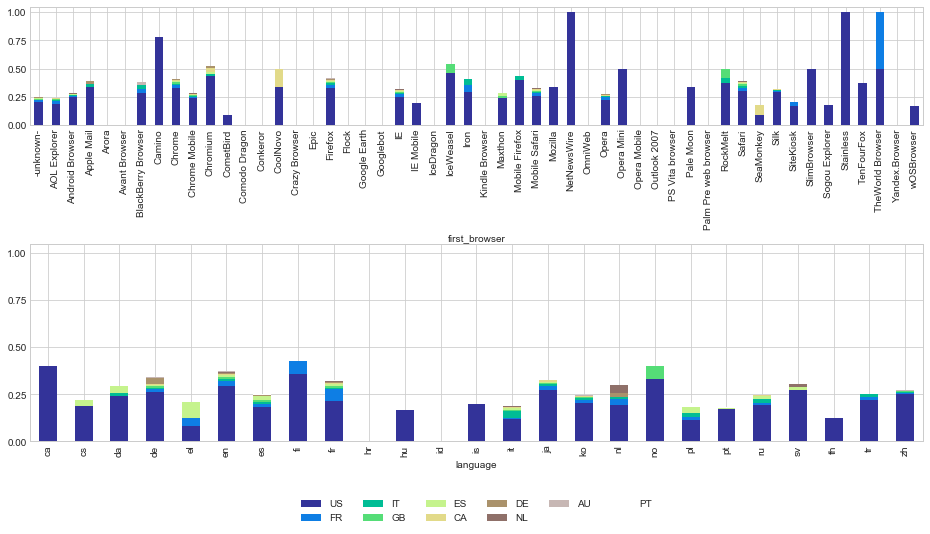

In [11]:
bar_order = ['US','FR','IT','GB','ES','CA','DE','NL','AU','PT']
cat_vars = ['gender', 'signup_method', 'signup_flow', 'affiliate_channel', 'affiliate_provider', 
            'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser', 'language']
from matplotlib.colors import Colormap
fig, ax4 = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
def pltCatVar(var,axis,ax_num):
    ctab = pd.crosstab([plot[var]], plot.country_destination).apply(lambda x: x/x.sum(), axis=1)
    ctab[bar_order].plot(kind='bar', stacked=True, ax=axis.reshape(-1)[ax_num],legend=False, 
                         colormap='terrain')
for i,var in enumerate(cat_vars[:8]):
    pltCatVar(var,ax4,i)
plt.tight_layout()
fig, ax5 = plt.subplots(nrows=2, ncols=1, figsize=(16, 8), sharey=True)
for i,var in enumerate(cat_vars[8:]):
    pltCatVar(var,ax5,i)
box = ax5[0].get_position()
ax5[0].set_position([box.x0, box.y0 + box.height * 0.4, box.width, box.height * 0.6])
ax5[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=6)

In [12]:
#Since 
train_users=train_users[train_users.country_destination != 'NDF']
train_users=train_users[train_users.country_destination != 'other']
len(train_users)

78814

In [13]:
# Extracting labels from the train data
train_users_labels = train_users['country_destination']
train_users_labels.head(10)

2     US
4     US
5     US
6     US
7     US
8     US
9     US
10    US
12    FR
15    CA
Name: country_destination, dtype: object

In [14]:
#train_users=train_users.drop(['id','country_destination'], axis=1)
#train_users = train_users.drop(['date_first_booking'], axis=1)

In [15]:
train_users = train_users.drop(['date_first_booking'], axis=1)

In [16]:
# Date is split into 3 parts as year, month and day in both test and train. These are added as
# new features in both test and train
date_acc_created = np.vstack(train_users.date_account_created.astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
train_users['created_year'] = date_acc_created[:,0]
train_users['created_month'] = date_acc_created[:,1]
train_users['created_day'] = date_acc_created[:,2]
train_users = train_users.drop(['date_account_created'], axis=1)

In [17]:
# Replacing invalid age with NaN in test and train
train_users.loc[train_users['age'] > 95, 'age'] = np.nan
train_users.loc[train_users['age'] < 16, 'age'] = np.nan

In [18]:
# Replace missing age with median
print (train_users.age.median())
train_users.loc[ train_users['age'].isnull(), 'age' ] = train_users.age.median()

33.0


In [19]:
train_users.groupby(['signup_method']).size()

signup_method
basic       57621
facebook    21104
google         89
dtype: int64

In [20]:
# Encoding the signup method for test
signup_translation = {'facebook' : 0,
                     'google' : 1,
                     'basic' : 2}
for data in [train_users]:
    data['signup_method'] = data['signup_method'].apply(lambda x: signup_translation[x])

In [21]:
gender_trans = {'-unknown-' : 0,
                      'MALE' : 1,
                      'FEMALE' : 2,
                      'OTHER' : 3}
for data in [train_users]:
    data['gender'] = data['gender'].apply(lambda x: gender_trans[x])

In [22]:
len(data)

78814

In [23]:
language_encoding = {'en'      :       1       ,
'zh'      :       2       ,
'fr'      :       3       ,
'es'      :       4       ,
'ko'      :       5       ,
'de'      :       6       ,
'it'      :       7       ,
'ru'      :       8       ,
'pt'      :       9       ,
'ja'      :       10      ,
'sv'      :       11      ,
'nl'      :       12      ,
'tr'      :       13      ,
'da'      :       14      ,
'pl'      :       15      ,
'cs'      :       16      ,
'no'      :       17      ,
'el'      :       18      ,
'th'      :       19      ,
'id'      :       20      ,
'hu'      :       21      ,
'fi'      :       22      ,
'ca'      :       23      ,
'is'      :       24      ,
'hr'      :       25}

for data in [train_users]:
    data['language'] = data['language'].apply(lambda x: language_encoding[x])

In [24]:

affiliate_channel_encoding = {'direct' : 1,
                             'sem-brand' : 2,
                             'sem-non-brand' : 3,
                             'other' : 4,
                             'api' : 5,
                             'seo' : 6,
                             'content' : 7,
                             'remarketing' : 8}
for data in [train_users]:
    data['affiliate_channel'] = data['affiliate_channel'].apply(lambda x: affiliate_channel_encoding[x])

In [25]:

affiliate_provider_encoding = {'direct':1,
'google':2,
'other':3,
'craigslist':4,
'bing':5,
'facebook':6,
'vast':7,
'padmapper':8,
'facebook-open-graph':9,
'yahoo':10,
'gsp':11,
'meetup':12,
'email-marketing':13,
'naver':14,
'baidu':15,
'yandex':16,
'wayn':17,
'daum':18}

for data in [train_users]:
    data['affiliate_provider'] = data['affiliate_provider'].apply(lambda x: affiliate_provider_encoding[x])

In [26]:

train_users.loc[ train_users['first_affiliate_tracked'].isnull(), 'first_affiliate_tracked'] = "untracked"
first_affiliate_tracked_encoding = {'untracked' : 1,
                                   'linked' : 2,
                                   'omg' : 3,
                                   'tracked-other' : 4,
                                   'product' : 5,
                                   'marketing' : 6,
                                   'local ops' : 7}
for data in [train_users]:
    data['first_affiliate_tracked'] = data['first_affiliate_tracked'].apply(lambda x: first_affiliate_tracked_encoding[x])

In [27]:
signup_app_encoding = {'Web' : 1,
                      'iOS' : 2,
                      'Android' : 3,
                      'Moweb' : 4}
for data in [train_users]:
    data['signup_app'] = data['signup_app'].apply(lambda x: signup_app_encoding[x])

In [28]:

first_device_type_encoding = { 'Mac Desktop' : 1,
                             'iPhone' : 2,
                             'Windows Desktop' : 3,
                             'Android Phone' : 4,
                             'iPad' : 5,
                             'Android Tablet' : 6,
                             'Other/Unknown' : 7,
                             'Desktop (Other)' : 8,
                             'SmartPhone (Other)' : 9}
for data in [train_users]:
    data['first_device_type'] = data['first_device_type'].apply(lambda x: first_device_type_encoding[x])

In [29]:
first_browser_encoding = {'Chrome':1,
'Safari':2,
'Firefox':3,
'-unknown-':4,
'IE':5,
'Mobile Safari':6,
'Chrome Mobile':7,
'Android Browser':8,
'AOL Explorer':9,
'Opera':10,
'Silk':11,
'Chromium':12,
'BlackBerry Browser':13,
'Maxthon':14,
'IE Mobile':15,
'Apple Mail':16,
'Sogou Explorer':17,
'Mobile Firefox':18,
'RockMelt':19,
'SiteKiosk':20,
'Iron':21,
'IceWeasel':22,
'Pale Moon':23,
'SeaMonkey':24,
'Yandex.Browser':25,
'CometBird':26,
'Camino':27,
'TenFourFox':28,
'wOSBrowser':29,
'CoolNovo':30,
'Avant Browser':31,
'Opera Mini':32,
'Mozilla':33,
'Comodo Dragon':34,
'TheWorld Browser':35,
'Crazy Browser':36,
'Flock':37,
'OmniWeb':38,
'SlimBrowser':39,
'Opera Mobile':40,
'Conkeror':41,
'Outlook 2007':42,
'Palm Pre web browser':43,
'Stainless':44,
'NetNewsWire':45,
'Kindle Browser':46,
'Epic':47,
'Googlebot':48,
'Arora':49,
'Google Earth':50,
'IceDragon':51,
'PS Vita browser':52,
'IBrowse' : 53,
'UC Browser' : 54,
'IBrowse': 55,
'Nintendo Browser' : 56}


for data in [train_users]:
    data['first_browser'] = data['first_browser'].apply(lambda x: first_browser_encoding[x])
    

In [30]:
train_users2=train_users
train_users2.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_range,created_year,created_month,created_day
2,4ft3gnwmtx,20090609231247,2,56.0,2,3,1,1,1,1,1,3,5,US,"(40, 60]",2010,9,28
4,87mebub9p4,20091208061105,0,41.0,2,0,1,1,1,1,1,1,1,US,"(40, 60]",2010,9,14
5,osr2jwljor,20100101215619,0,33.0,2,0,1,4,3,3,1,1,1,US,NaN,2010,1,1
6,lsw9q7uk0j,20100102012558,2,46.0,2,0,1,4,4,1,1,1,2,US,"(40, 60]",2010,1,2
7,0d01nltbrs,20100103191905,2,47.0,2,0,1,1,1,3,1,1,2,US,"(40, 60]",2010,1,3


In [31]:
train_users=train_users.drop(['id','country_destination'], axis=1)
train_users.groupby(['signup_method']).size()

signup_method
0    21104
1       89
2    57621
dtype: int64

In [32]:
X=train_users[['gender','age','signup_app',"signup_method",'affiliate_channel','affiliate_provider','first_affiliate_tracked','language']]
X.head()

,gender,age,signup_app,signup_method,affiliate_channel,affiliate_provider,first_affiliate_tracked,language
2,2,56.0,1,2,1,1,1,1
4,0,41.0,1,2,1,1,1,1
5,0,33.0,1,2,4,3,3,1
6,2,46.0,1,2,4,4,1,1
7,2,47.0,1,2,1,1,3,1


In [33]:
Xcluster=train_users[['age','gender','signup_method','language','affiliate_provider']]
Xcluster=Xcluster.reset_index()
Xcluster=Xcluster[['age','gender','signup_method','language','affiliate_provider']]
Xcluster.head()

,age,gender,signup_method,language,affiliate_provider
0,56.0,2,2,1,1
1,41.0,0,2,1,1
2,33.0,0,2,1,3
3,46.0,2,2,1,4
4,47.0,2,2,1,1


In [34]:
country_destination_encoding = {
'US' : 1,
'PT' : 2,
'FR' : 3,
'IT' : 4,
'GB' : 5,
'ES' : 6,
'CA' : 7,
'DE' : 8,
'NL' : 9,
'AU' : 10}

# Convert series to frame
labels_df = train_users_labels.to_frame()

for data in [labels_df]:
    Y = data['country_destination'].apply(lambda x: country_destination_encoding[x])
Y.head()

2    1
4    1
5    1
6    1
7    1
Name: country_destination, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
#Random state assignment is to maintain consistency of splitted dataset over multiple iterations
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=2)

In [36]:
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.model_selection import cross_val_score

/Users/rajdaiya/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=35,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [38]:
len(X_train),len(Y_train)

(55169, 55169)

In [39]:
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=35,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
#Feature Importance of input parameters
print(xgb.feature_importances_)

[ 0.09432191  0.37775692  0.04927264  0.03472548  0.10464571  0.10886908
  0.10793055  0.12247771]


In [41]:
predict=xgb.predict(X_test)
print(predict)

[1 1 1 ..., 1 1 1]


In [42]:
print('XGB Score:')
xgb.score(X_test,Y_test)

XGB Score:


0.78989215478959607

In [43]:
scores=cross_val_score(xgb,X_test,Y_test,cv=5)
print(scores)

[ 0.78930685  0.78947368  0.79023049  0.78997462  0.79047619]


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
gb.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=30,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [46]:
#Feature Importance of input parameters
print(gb.feature_importances_)

[ 0.09178304  0.32701908  0.06057626  0.04327687  0.09877703  0.08889221
  0.11187613  0.17779939]


In [47]:
predict=gb.predict(X_test)
print(predict)

[1 1 1 ..., 1 1 1]


In [48]:
print('Gradient boosting Score:')
gb.score(X_test,Y_test)

Gradient boosting Score:


0.78951152463522944

In [49]:
scores=cross_val_score(gb,X_test,Y_test,cv=5)
print(scores)

[ 0.78867287  0.78883957  0.78875026  0.78891709  0.79026455]


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [51]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [52]:
#Feature Importance of input parameters
print(rf.feature_importances_)

[ 0.0845716   0.23166499  0.21357815  0.03051238  0.12027094  0.15020272
  0.07266689  0.09653234]


In [53]:
predict=rf.predict(X_test)
print(predict)

[1 1 1 ..., 1 1 1]


In [54]:
print('Random Forests Score:')
rf.score(X_test,Y_test)

Random Forests Score:


0.79014590822584052

In [55]:
scores=cross_val_score(rf,X_test,Y_test,cv=5)
print(scores)

[ 0.7897295   0.78989643  0.79023049  0.79018613  0.79068783]


----------------------------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------

In [56]:
# Extracting labels from the train data
train_users_labels2 = train_users2['signup_method']
train_users_labels2.head(10)

2     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
12    2
15    2
Name: signup_method, dtype: int64

In [57]:
country_destination_encoding = {
'US' : 1,
'other' : 2,
'FR' : 3,
'IT' : 4,
'GB' : 5,
'ES' : 6,
'CA' : 7,
'DE' : 8,
'NL' : 9,
'AU' : 10,
'PT' : 11}

for data in [train_users2]:
    data['country_destination'] = data['country_destination'].apply(lambda x: country_destination_encoding[x])

In [58]:
train_users2.head()

,id,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,age_range,created_year,created_month,created_day
2,4ft3gnwmtx,20090609231247,2,56.0,2,3,1,1,1,1,1,3,5,1,"(40, 60]",2010,9,28
4,87mebub9p4,20091208061105,0,41.0,2,0,1,1,1,1,1,1,1,1,"(40, 60]",2010,9,14
5,osr2jwljor,20100101215619,0,33.0,2,0,1,4,3,3,1,1,1,1,NaN,2010,1,1
6,lsw9q7uk0j,20100102012558,2,46.0,2,0,1,4,4,1,1,1,2,1,"(40, 60]",2010,1,2
7,0d01nltbrs,20100103191905,2,47.0,2,0,1,1,1,3,1,1,2,1,"(40, 60]",2010,1,3


In [59]:
train_users2=train_users2.drop(['id','signup_method'], axis=1)
#X1=train_users2
X1=train_users2[['gender','age','country_destination','language','signup_app','signup_flow','affiliate_channel','affiliate_provider','first_affiliate_tracked']]
X1.head()

,gender,age,country_destination,language,signup_app,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked
2,2,56.0,1,1,1,3,1,1,1
4,0,41.0,1,1,1,0,1,1,1
5,0,33.0,1,1,1,0,4,3,3
6,2,46.0,1,1,1,0,4,4,1
7,2,47.0,1,1,1,0,1,1,3


In [60]:
# Convert series to frame
# Encoding the signup method for test
signup_translation = {'facebook' : 0,
                     'google' : 1,
                     'basic' : 2}
labels_df2 = train_users_labels2.to_frame()
labels_df2.head()

,signup_method
2,2
4,2
5,2
6,2
7,2


In [61]:
for data in [labels_df2]:
    Y1 = data['signup_method']

In [62]:
Y1.head()

2    2
4    2
5    2
6    2
7    2
Name: signup_method, dtype: int64

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#Random state assignment is to maintain consistency of splitted dataset over multiple iterations
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,Y1,test_size=0.30,random_state=2)

In [64]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=45,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.5)

In [65]:
len(X_train1),len(Y_train1)

(55169, 55169)

In [66]:
xgb.fit(X_train1,Y_train1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.5, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=45,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=2,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.5)

In [67]:
print('XGB Score:')
xgb.score(X_test1,Y_test1)

XGB Score:


0.75001057305984353

In [68]:
scores=cross_val_score(xgb,X_test1,Y_test1,cv=5)
print(scores)

[ 0.74608879  0.74244026  0.74772679  0.74286318  0.74492386]


In [69]:
predict=xgb.predict(X_test1)
print(predict)

[2 2 2 ..., 2 2 2]


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(init=None,learning_rate=0.1, loss='deviance', 
              max_depth=7,min_impurity_decrease=0.0,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=45,
              presort='auto', random_state=2, subsample=1.0,
              warm_start=False)
gb.fit(X_train1,Y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=45,
              presort='auto', random_state=2, subsample=1.0, verbose=0,
              warm_start=False)

In [71]:
print('Gradient boosting Score:')
gb.score(X_test1,Y_test1)

Gradient boosting Score:


0.75009515753859168

In [72]:
scores=cross_val_score(gb,X_test1,Y_test1,cv=5)
print(scores)

[ 0.74904863  0.74941848  0.75111017  0.75195602  0.74661591]


In [73]:
predict=gb.predict(X_test1)
print(predict)

[2 2 2 ..., 2 2 2]


In [74]:
from sklearn.cluster import KMeans

In [75]:
kmeans=KMeans(n_clusters=4).fit(Xcluster)

In [76]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [77]:
cluster=pd.DataFrame(kmeans.labels_,columns=['cluster'])
cluster.head()

,cluster
0,1
1,2
2,0
3,2
4,2


In [78]:
cluster_result=pd.concat([Xcluster,cluster['cluster']],axis=1)

In [79]:
cluster_result.head()

,age,gender,signup_method,language,affiliate_provider,cluster
0,56.0,2,2,1,1,1
1,41.0,0,2,1,1,2
2,33.0,0,2,1,3,0
3,46.0,2,2,1,4,2
4,47.0,2,2,1,1,2


In [80]:
cluster_result['gender'].value_counts()

2    28833
0    25549
1    24278
3      154
Name: gender, dtype: int64

In [81]:
gender_cluster = pd.crosstab(index=cluster_result['cluster'], columns=cluster_result['gender'])
print(gender_cluster)

gender       0      1      2   3
cluster                         
0        19422  11247  12692  78
1         1082   1941   2482   6
2         2111   4739   4521  37
3         2934   6351   9138  33


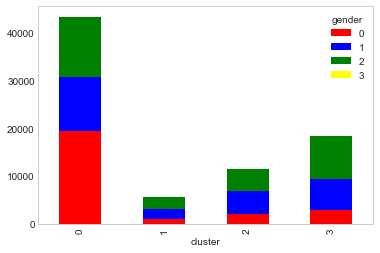

In [82]:
gender_cluster.plot(kind='bar', stacked=True, color=['red','blue','green','yellow'], grid=False)

In [83]:
language_cluster = pd.crosstab(index=cluster_result['cluster'], columns=cluster_result['language'])

In [84]:
language_cluster

language,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,21,22,23,24
cluster,,,,,,,,,,,,,,,,,,,,,
0,42504,198,186,113,105,128,39,44,22,42,...,7,3,3,4,4,2,1,3,1,1
1,5456,8,11,9,4,7,5,5,1,2,...,0,0,0,0,0,0,0,0,0,0
2,11192,36,34,39,12,30,13,12,6,13,...,4,2,0,1,0,0,0,0,1,0
3,17718,200,149,67,62,87,40,35,15,16,...,6,6,4,7,1,1,2,3,0,0


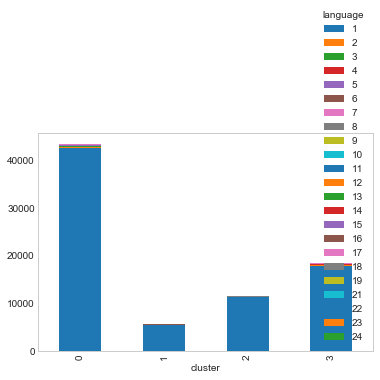

In [85]:
language_cluster.plot(kind='bar', stacked=True, grid=False)

In [86]:
affiliate_provider_cluster = pd.crosstab(index=cluster_result['cluster'], columns=cluster_result['affiliate_provider'])
print(affiliate_provider_cluster)

affiliate_provider     1     2     3    4    5    6    7    8   9   10  11  \
cluster                                                                      
0                   29697  9459  2299  960  352  263  105   95  60  88  14   
1                    2958  2053   155  100  157   23   28    2  12  17   5   
2                    7110  3108   539  296  142   69   54   12  25  38   8   
3                   12736  3697  1179  205   86  324   26  122  30   9   3   

affiliate_provider  12  13  14  15  16  
cluster                                 
0                   18  20   6   1   2  
1                    0   1   0   0   0  
2                    2   4   0   1   0  
3                   20   6   6   5   2  


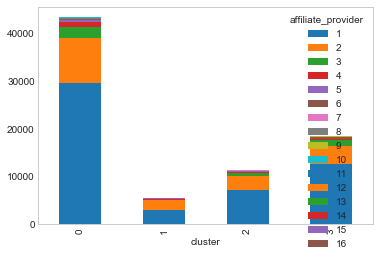

In [87]:
affiliate_provider_cluster.plot(kind='bar', stacked=True, grid=False)

In [88]:
cluster_result_age=cluster_result[['age','cluster']]
cluster_result_age.groupby('cluster').describe()

age                                                   
           count       mean       std   min   25%   50%   75%   max
cluster                                                            
0        43439.0  33.437142  2.096119  30.0  33.0  33.0  34.0  39.0
1         5511.0  61.782617  6.634201  54.0  57.0  60.0  65.0  95.0
2        11408.0  45.291813  3.934120  40.0  42.0  45.0  48.0  53.0
3        18456.0  25.868281  2.699115  16.0  24.0  26.0  28.0  29.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2a9cab38>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a2b8383c8>]], dtype=object)

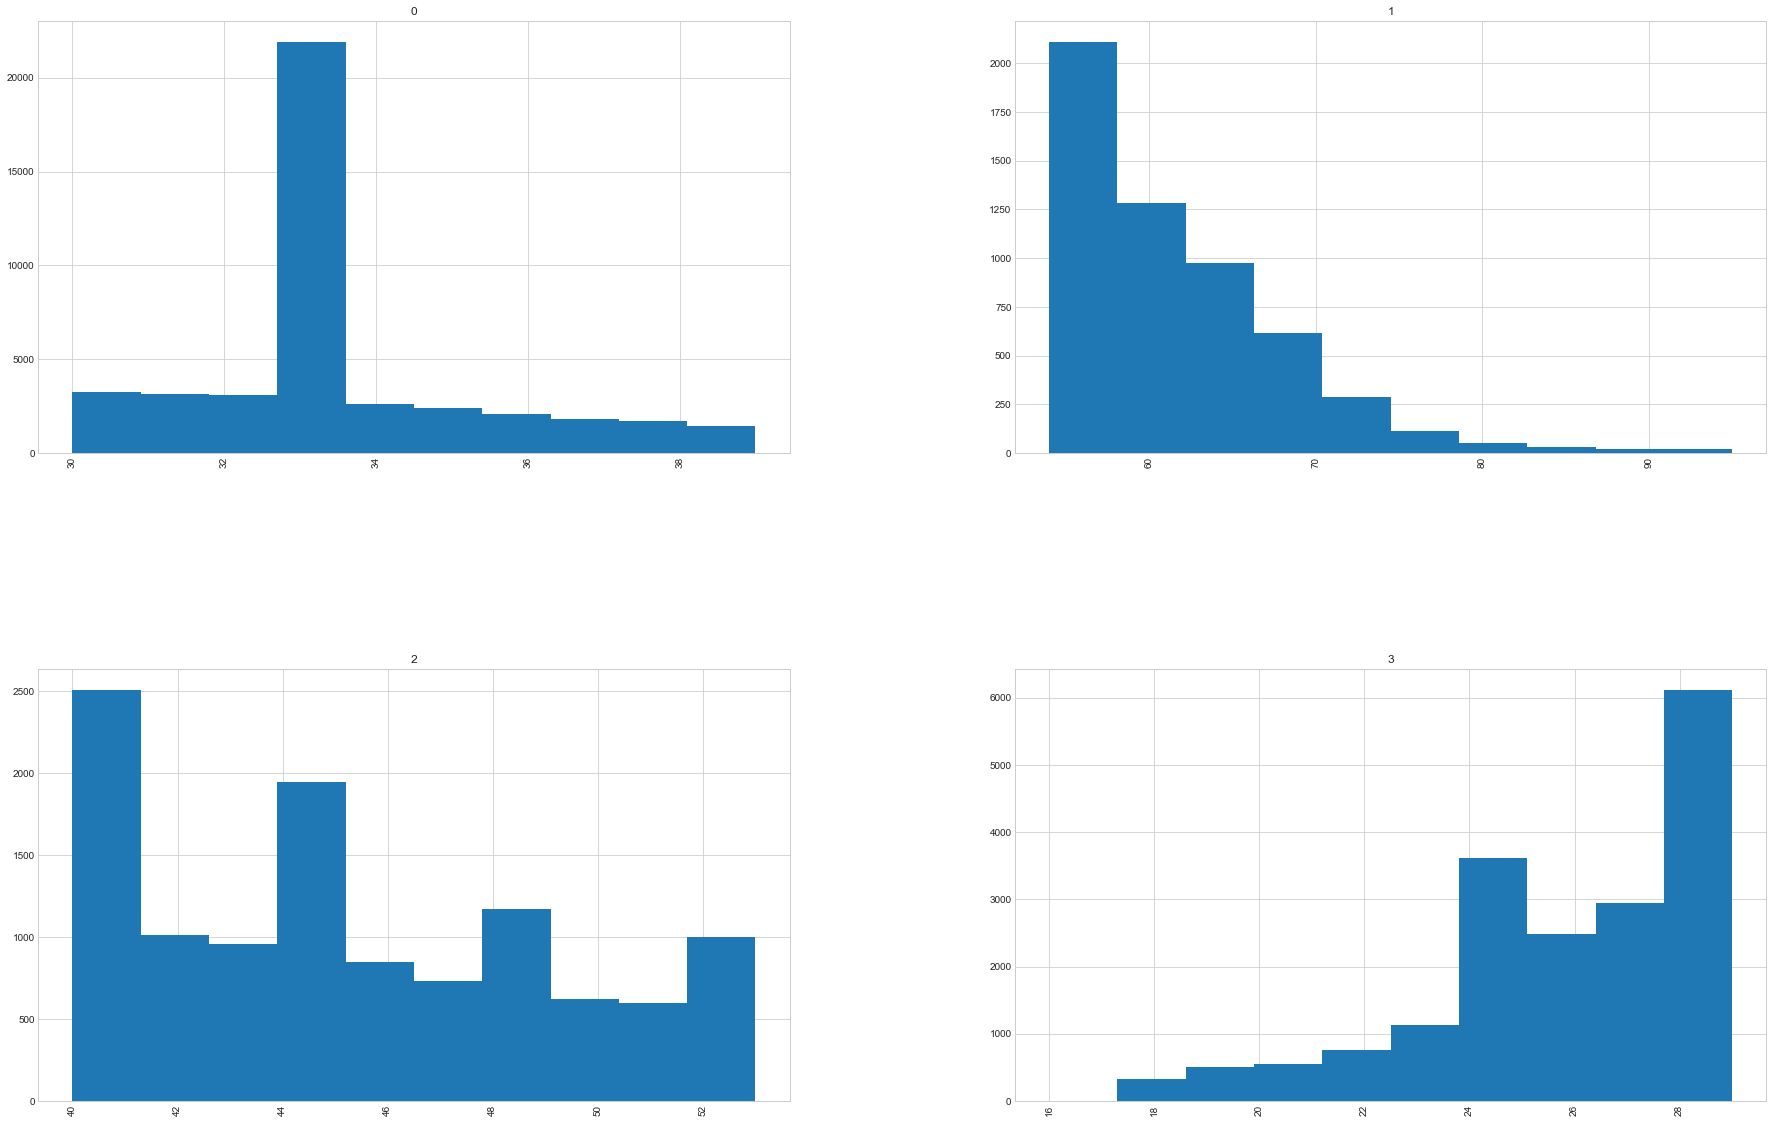

In [89]:
cluster_result['age'].hist(by=cluster_result['cluster'], figsize=(30,20))

In [90]:
from sklearn import metrics
metrics.silhouette_score(Xcluster, kmeans.labels_, metric='euclidean', sample_size=1000, random_state=50)



0.52409127499580999